# 第6章 関係から予測しよう：回帰分析

## 21 2種類のデータの関係性の強さ：相関係数

リスト6.1

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Yu Gothic", "Hiragino Maru Gothic Pro"])

data = {
    "数学" : [100, 85, 90, 95, 80, 80, 75, 65, 65, 60, 55, 45, 45],
    "理科" : [94, 90, 95, 90, 85, 80, 75, 70, 60, 60, 50, 50, 48],
    "社会" : [80, 88, 70, 62, 86, 70, 79, 65, 75, 67, 75, 68, 60]
}
df = pd.DataFrame(data)
df.head()

,数学,理科,社会
0,100,94,80
1,85,90,88
2,90,95,70
3,95,90,62
4,80,85,86


リスト6.2

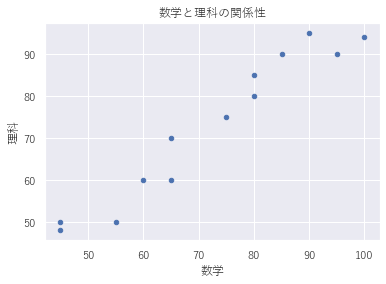

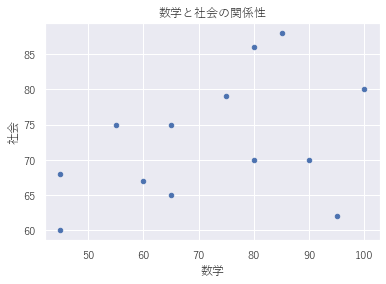

In [2]:
df.plot.scatter(x="数学", y="理科", c="b")
plt.title("数学と理科の関係性")
plt.show()

df.plot.scatter(x="数学", y="社会", c="b")
plt.title("数学と社会の関係性")
plt.show()

### 相関係数

リスト6.3

In [3]:
print("数学と理科 =", df.corr()["数学"]["理科"])
print("数学と社会 =", df.corr()["数学"]["社会"])

数学と理科 = 0.9688434503857296
数学と社会 = 0.39425173157746285


リスト6.4

In [4]:
print(df.corr())

          数学        理科        社会
数学  1.000000  0.968843  0.394252
理科  0.968843  1.000000  0.413466
社会  0.394252  0.413466  1.000000


## 22 散布図の上に線を引いて予測

リスト6.5

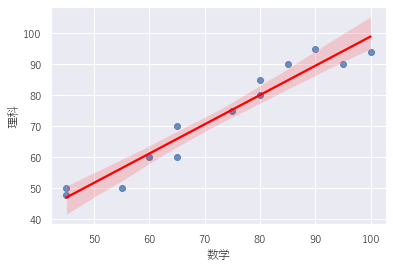

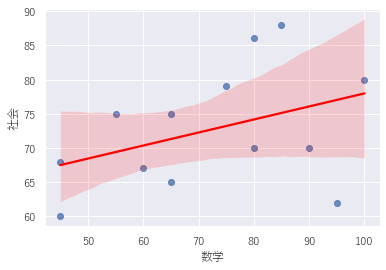

In [5]:
sns.regplot(data=df, x="数学", y="理科", line_kws={"color":"red"})
plt.show()

sns.regplot(data=df, x="数学", y="社会", line_kws={"color":"red"})
plt.show()

リスト6.6

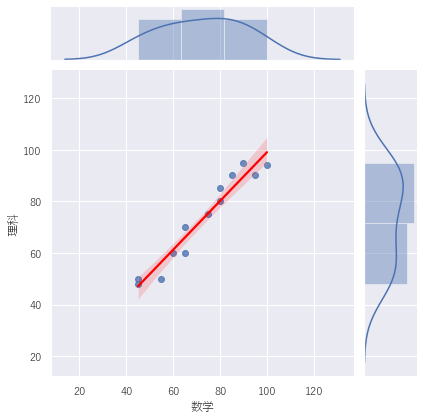

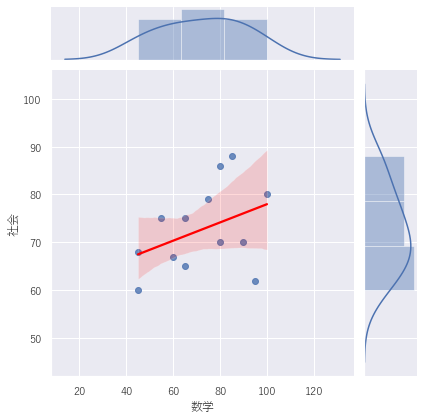

In [6]:
sns.jointplot(data=df, x="数学", y="理科", kind="reg", line_kws={"color":"red"})
plt.show()

sns.jointplot(data=df, x="数学", y="社会", kind="reg", line_kws={"color":"red"})
plt.show()

## 23 総当たりで表示させる散布図

###  相関行列を色の熱さで表現する：ヒートマップ

リスト6.7

In [7]:
print(df.corr())

          数学        理科        社会
数学  1.000000  0.968843  0.394252
理科  0.968843  1.000000  0.413466
社会  0.394252  0.413466  1.000000


リスト6.8

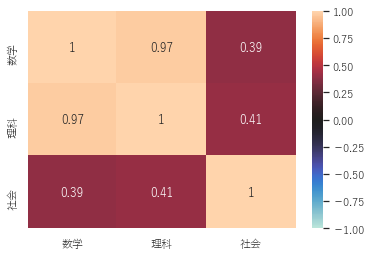

In [8]:
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.show()

### 総渡りで表示させる散布図：散布図行列

リスト6.9

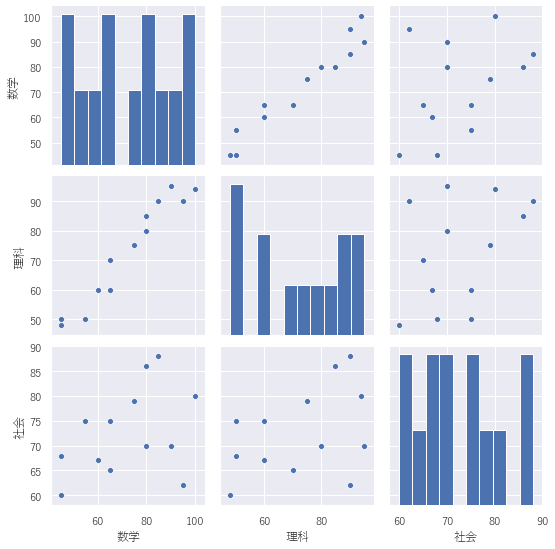

In [9]:
sns.pairplot(data=df)
plt.show()

リスト6.10

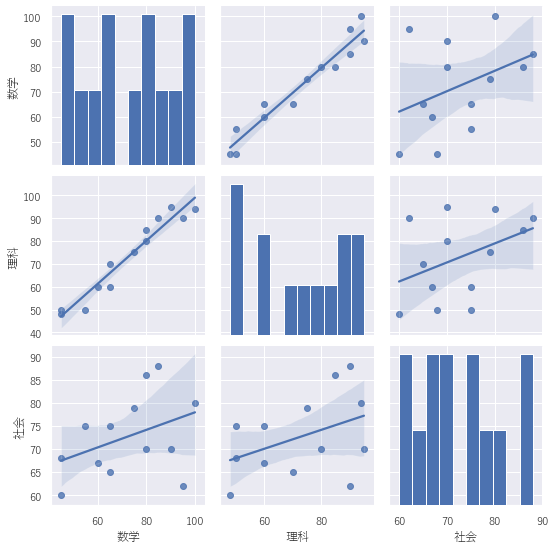

In [10]:
sns.pairplot(data=df, kind="reg")
plt.show()

## 24 アヤメのデータを見てみよう

リスト6.11

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


リスト6.12

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


リスト6.13

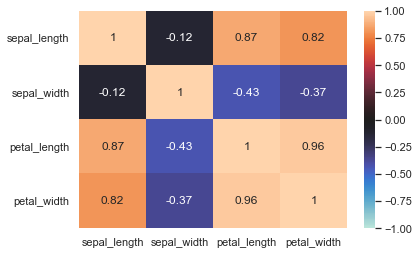

In [13]:
sns.heatmap(df.corr(), annot=True, vmax=1,vmin=-1, center=0)
plt.show()

リスト6.14

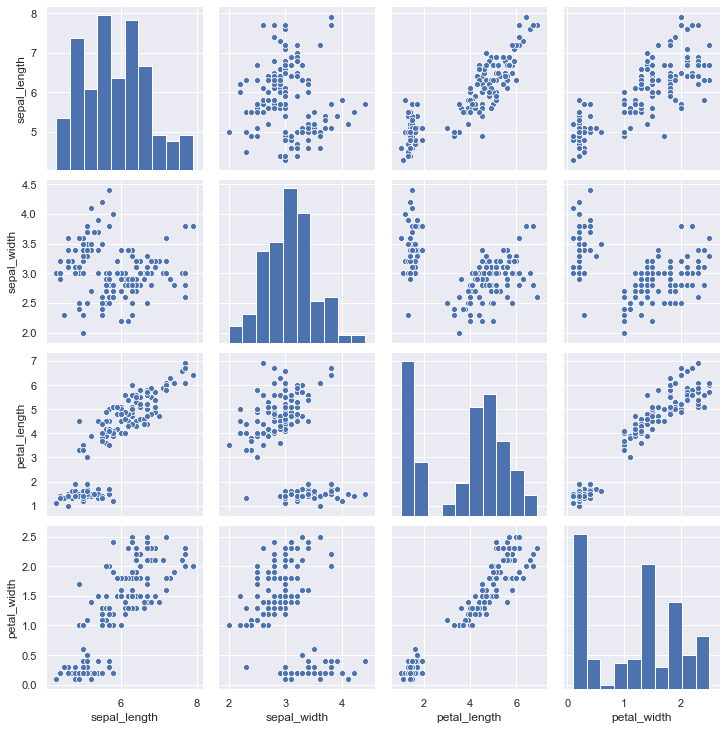

In [14]:
sns.pairplot(data=df)
plt.show()

リスト6.15

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


リスト6.16

In [16]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

リスト6.17

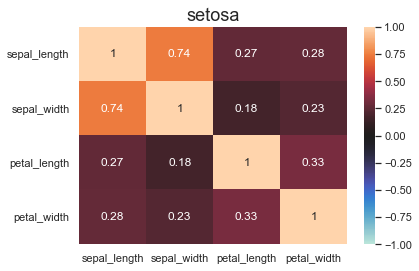

In [17]:
onespecies = "setosa"

one = df[df["species"]==onespecies]
sns.heatmap(one.corr(), annot=True, vmax=1,vmin=-1, center=0)
plt.title(onespecies, fontsize=18)
plt.show()

リスト6.18

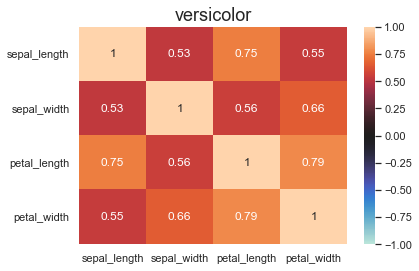

In [18]:
onespecies = "versicolor"

one = df[df["species"]==onespecies]
sns.heatmap(one.corr(), annot=True, vmax=1,vmin=-1, center=0)
plt.title(onespecies, fontsize=18)
plt.show()

リスト6.19

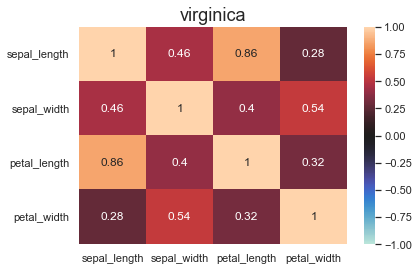

In [19]:
onespecies = "virginica"

one = df[df["species"]==onespecies]
sns.heatmap(one.corr(), annot=True, vmax=1,vmin=-1, center=0)
plt.title(onespecies, fontsize=18)
plt.show()

リスト6.20

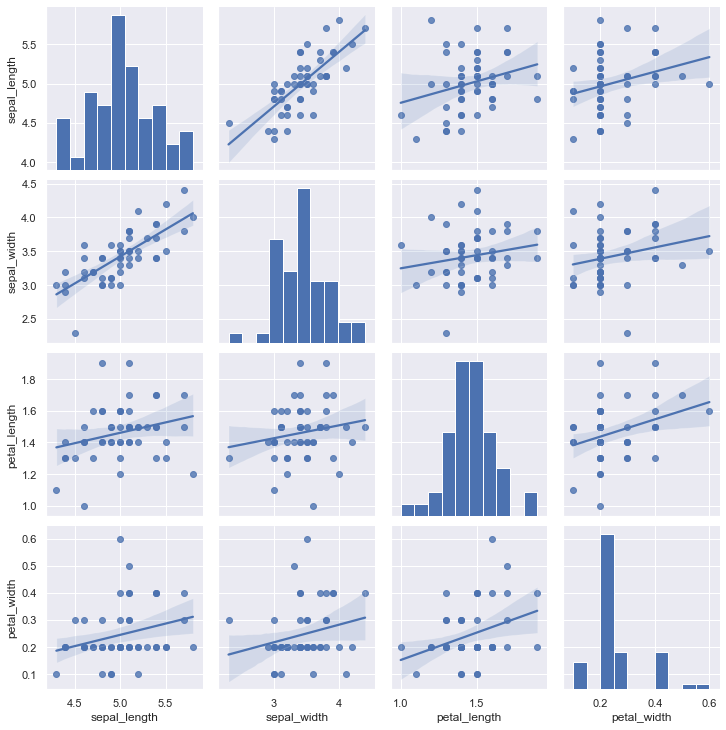

In [20]:
onespecies = "setosa"

one = df[df["species"]==onespecies]
sns.pairplot(data=one, kind="reg")
plt.show()

リスト6.21

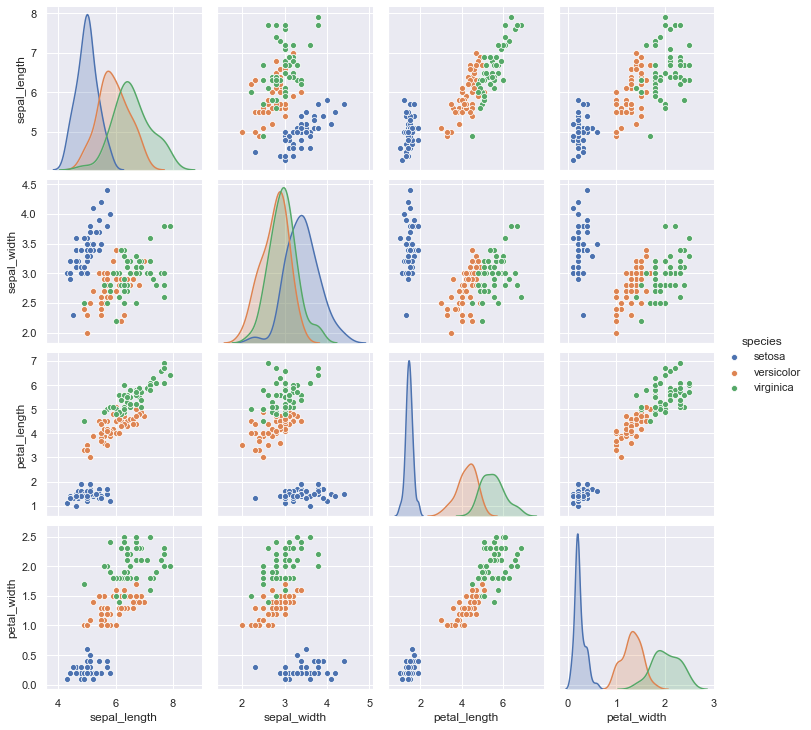

In [21]:
sns.pairplot(data=df, hue="species")
plt.show()